In [1]:
import tensorflow as tf
tf.enable_eager_execution()

import numpy as np
import matplotlib.pyplot as plt

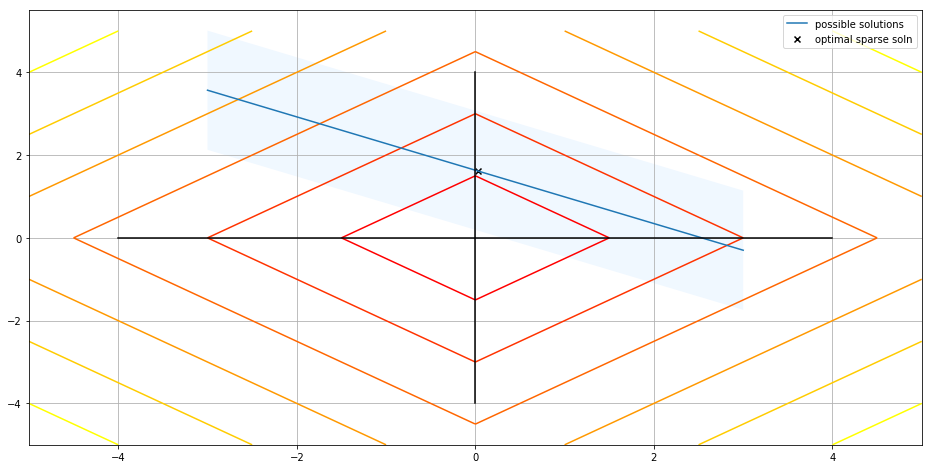

In [2]:
plt.figure(figsize=(16, 8))

A = tf.constant(np.random.standard_normal((2,2)), dtype=tf.float32)
stddev = 1.0
    
def f(x):
    y = tf.matmul(A, x)
    y = y[0:1]  # subsample.
    return y + tf.random_normal(y.shape, stddev=stddev)

x = tf.random_normal((2,1))  # truth
y = f(x)  # observation

# plot all x consistent with y
def possible_solns(y):
    # y_1 = a_11*x_1 + a_12*x_2
    # x_2 = (y_1 - a_11*x_1)/a_12
    x_1 = np.linspace(-3, 3, 100)
    return x_1, np.reshape((y - A[0,0]*x_1)/A[0,1], -1)

x_1, x_2 = possible_solns(y)
plt.plot(x_1, x_2, label='possible solutions')
plt.fill_between(x_1, possible_solns(y-stddev)[1], possible_solns(y+stddev)[1], 
                 facecolor='#F0F8FF', edgecolor='none')

def l1(x, y):
    return np.abs(x) + np.abs(y)


idx = np.argmin([l1(x1, x2) for x1, x2 in zip(x_1, x_2)])
plt.scatter(x_1[idx], x_2[idx], c='k', marker='x', label='optimal sparse soln')


# fig = plt.figure()
x_1 = x_2 = np.linspace(-5.0, 5.0, 1000)
X1, X2 = np.meshgrid(x_1, x_2)
y = np.array([l1(x,y) for x,y in zip(np.ravel(X1), np.ravel(X2))])
Y = y.reshape(X1.shape)

plt.contour(X1, X2, Y, cmap=plt.cm.autumn)

plt.legend()

plt.grid()

x = np.linspace(-4, 4, 100)
y = 0*x
plt.plot(x, y, c='k', label='sparse signals')
plt.plot(y, x, c='k')

In [ ]:
# TODO is it possible to generate this sort of visualisation for mnist?
# if we use a 2d hidden space then !?

# what about a 3d visualisation!?
# so in 3d with 1 sample we have a plane that intersects a 
# 4d vector field at a line rather than a point (no. only in some cases)
# so the prior is insufficient to produce a unique output!?

# when there is some kind of symmetry in A then there might be multiple solutions!?
# multiple solutions are bad! bc we round and pick a few of the sparse bases, 
# we might round 0.49 -> 0 and 0.51 -> 1.0...